In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
df=pd.read_csv('Health.csv',sep='\t')

In [4]:
df

,Ethinicity,Height(CM),Weiht(KG),Will Surv 70
0,White,186.0,90.0,Yes
1,African,185.0,98.0,No
2,Asian,175.0,80.0,No
3,White,180.0,88.0,Yes
4,Asian,178.0,NaN,No
5,Asian,172.0,72.0,Yes
6,African,178.0,75.0,No
7,White,NaN,89.0,Yes
8,African,186.0,90.0,Yes


In [5]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [6]:
y

array(['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes'],
      dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ethinicity    9 non-null      object 
 1   Height(CM)    8 non-null      float64
 2   Weiht(KG)     8 non-null      float64
 3   Will Surv 70  9 non-null      object 
dtypes: float64(2), object(2)
memory usage: 416.0+ bytes


### How to count total number of nan values
#### 1 Using describe() or count()  
[It returns non-Nan values in each column. We can get number of nan values if we know the total number of observations]

In [8]:
df.count()

Ethinicity      9
Height(CM)      8
Weiht(KG)       8
Will Surv 70    9
dtype: int64

#### 2 Using sum

In [9]:
df.isnull()

,Ethinicity,Height(CM),Weiht(KG),Will Surv 70
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,False,False,False
7,False,True,False,False
8,False,False,False,False


In [10]:
df["Height(CM)"].isnull().sum()

1

In [11]:
df["Ethinicity"].isnull().sum()

0

### Handling missing values

In [12]:
from sklearn.impute import SimpleImputer


In [13]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imp=imp.fit(X[:,1:])
X[:,1:]=imp.transform(X[:,1:])
X

array([['White', 186.0, 90.0],
       ['African', 185.0, 98.0],
       ['Asian', 175.0, 80.0],
       ['White', 180.0, 88.0],
       ['Asian', 178.0, 85.25],
       ['Asian', 172.0, 72.0],
       ['African', 178.0, 75.0],
       ['White', 180.0, 89.0],
       ['African', 186.0, 90.0]], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
y=lc.fit_transform(y)

In [15]:
y

array([1, 0, 0, 1, 0, 1, 0, 1, 1])

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Ethinicity", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

array([[0.0, 0.0, 1.0, 186.0, 90.0],
       [1.0, 0.0, 0.0, 185.0, 98.0],
       [0.0, 1.0, 0.0, 175.0, 80.0],
       [0.0, 0.0, 1.0, 180.0, 88.0],
       [0.0, 1.0, 0.0, 178.0, 85.25],
       [0.0, 1.0, 0.0, 172.0, 72.0],
       [1.0, 0.0, 0.0, 178.0, 75.0],
       [0.0, 0.0, 1.0, 180.0, 89.0],
       [1.0, 0.0, 0.0, 186.0, 90.0]], dtype=object)

In [17]:
help(ColumnTransformer)

Help on class ColumnTransformer in module sklearn.compose._column_transformer:

class ColumnTransformer(sklearn.base.TransformerMixin, sklearn.utils.metaestimators._BaseComposition)
 |  Applies transformers to columns of an array or pandas DataFrame.
 |  
 |  This estimator allows different columns or column subsets of the input
 |  to be transformed separately and the features generated by each transformer
 |  will be concatenated to form a single feature space.
 |  This is useful for heterogeneous or columnar data, to combine several
 |  feature extraction mechanisms or transformations into a single transformer.
 |  
 |  Read more in the :ref:`User Guide <column_transformer>`.
 |  
 |  .. versionadded:: 0.20
 |  
 |  Parameters
 |  ----------
 |  transformers : list of tuples
 |      List of (name, transformer, column(s)) tuples specifying the
 |      transformer objects to be applied to subsets of the data.
 |  
 |      name : string
 |          Like in Pipeline and FeatureUnion, th

In [18]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [20]:
X_train

array([[ 1.15470054, -0.63245553, -0.63245553,  0.88159065,  1.48988518],
       [-0.8660254 ,  1.58113883, -0.63245553, -0.55834074, -0.02546812],
       [ 1.15470054, -0.63245553, -0.63245553,  1.08729513,  0.53907526],
       [ 1.15470054, -0.63245553, -0.63245553, -0.55834074, -1.24369333],
       [-0.8660254 , -0.63245553,  1.58113883, -0.14693177,  0.30137279],
       [-0.8660254 , -0.63245553,  1.58113883,  1.08729513,  0.53907526],
       [-0.8660254 ,  1.58113883, -0.63245553, -1.79256765, -1.60024704]])

### Visualizing

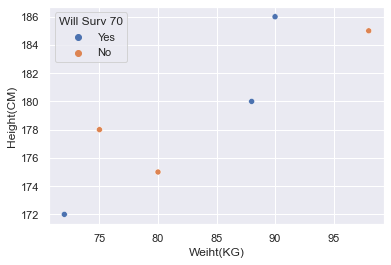

In [23]:
sns.scatterplot(data=df,x="Weiht(KG)",y="Height(CM)",hue="Will Surv 70")